# In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
from pydataset import data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df_iris = data('iris')
df_iris.head()

### print the first 3 rows

In [ ]:
print(df_iris.head(3))

### print the number of rows and columns

In [ ]:
r, c = df_iris.shape
print(f'Rows = {r}, Columns = {c}')

### print the column names

In [ ]:
print(df_iris.columns)

### print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [ ]:
print(df_iris.describe().T)

### No rescaling needed as all numerical values appear to be using the same unit of measurement

## Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [ ]:
df_excel = pd.read_excel('Spreadsheets_Exercises_Solutions.xlsx')
df_excel.head()

In [ ]:
df_excel = df_excel.iloc[: , :-1]
df_excel.head()

### assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)
df_excel_sample

### print the number of rows of your originial dataframe

In [ ]:
r, c = df_excel.shape
print(f'Rows = {r}')

### print the first 5 column names

In [ ]:
print(df_excel.columns.values[:5])

### print the column names that have a data type of object

In [ ]:
print(df_excel.select_dtypes(object).columns.values)

### compute the range for each of the numeric variables

In [ ]:
monthly_charges_range = (df_excel.monthly_charges.max(), df_excel.monthly_charges.min())
avg_monthly_charges_range = (df_excel.average_monthly_charges.max(), df_excel.average_monthly_charges.min())
print(f'Ranges (max, min) for Monthly Charges = {monthly_charges_range} and Average Monthly Charges = {avg_monthly_charges_range}')

## Read the data from this google sheet into a dataframe, df_google

In [ ]:
import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

### print the first 3 rows

In [ ]:
print(df_google.head(3))

### print the number of rows and columns

In [ ]:
r, c = df_google.shape
print(f'Rows = {r}, Columns = {c}')

### print the column names

In [ ]:
print(df_google.columns.values)

### print the data type of each column

In [ ]:
print(df_google.dtypes)

### print the summary statistics for each fo the numeric variables

In [ ]:
df_google.describe().T

### print the unique values for each of your categorical variables

In [ ]:
df_google.nunique()

In [ ]:
for column in df_google.select_dtypes(object).columns:
    print(f"Values in the {column} column:")
    print(df_google[column].value_counts())
    print("--------------")
    print("/")

In [ ]:
# .copy() method used to copy instead of point to something 

## Make a new python module, acquire.py to hold the following data aquisition functions:


### 1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

### 2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

### 3. Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

# Data Preparation
## Using the Iris Data

### 1. Use the function defined in acquire.py to load the iris data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

import acquire

In [2]:
df = acquire.get_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
species_id,150.0,2.000000,0.819232,1.0,1.0,2.00,3.0,3.0
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [5]:
df.isnull().sum()

species_id      0
species_name    0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

### 2. Drop the specied_id and measurement_id columns.

In [6]:
df = df.drop(columns = ['species_id'])
df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


### 3. Rename the species_name column to just species.

In [7]:
df = df.rename(columns= {'species_name':'species'})
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


### 4. Create dummy variables of the species name.

In [8]:
df_dummy = pd.get_dummies(df[['species']])
df_dummy.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied. 

In [9]:
def prep_iris(df):
    df = df.drop(columns = ['species_id'])
    df = df.rename(columns= {'species_name':'species'})
    df_dummy = pd.get_dummies(df[['species']])
    return df, df_dummy
   

In [10]:
df = pd.concat([df, df_dummy], axis=1)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [11]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 25% validate, 75% train. 

train, test = train_test_split(df, test_size = 0.2, random_state = 123, stratify = df.species)
train, validate = train_test_split(train, test_size = 0.25, random_state = 123, stratify = train.species)

In [12]:
train.shape, validate.shape, test.shape

((90, 8), (30, 8), (30, 8))

In [13]:
def split_iris_data(df):
    train, test = train_test_split(df, test_size = 0.2, random_state = 123, stratify = df.species)
    train, validate = train_test_split(train, test_size = 0.25, random_state = 123, stratify = train.species)
    return train, validate, test

# Exploratory Analysis Exercises

In [14]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import explore

plt.rcParams['figure.figsize'] = (4, 2)

# Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

In [15]:
df.shape

(150, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             150 non-null    object 
 1   sepal_length        150 non-null    float64
 2   sepal_width         150 non-null    float64
 3   petal_length        150 non-null    float64
 4   petal_width         150 non-null    float64
 5   species_setosa      150 non-null    uint8  
 6   species_versicolor  150 non-null    uint8  
 7   species_virginica   150 non-null    uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 7.5+ KB


In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333,0.333333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


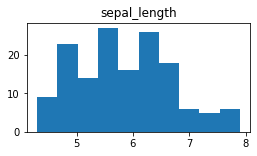

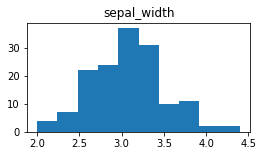

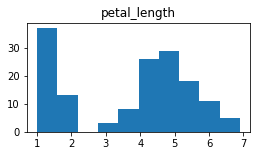

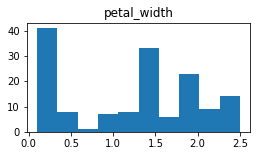

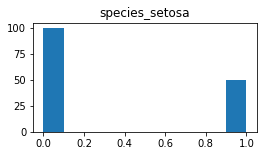

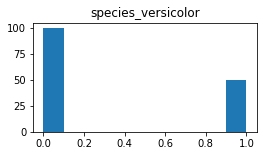

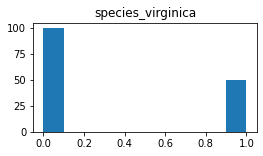

In [18]:
# plot distribution of numeric columns

# create a list of numeric column names

num_cols = df.select_dtypes(include = 'number').columns
num_cols

# loop through the list and plot a histogram for each numeric column


for column in num_cols:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

In [19]:
# describe object columns

obj_cols = df.select_dtypes(include = 'object').columns

for col in obj_cols:
    print(df[col].value_counts())
    print('\n')
    
    print(df[col].value_counts(normalize=True, dropna = False))
    print('---------------------------------\n')



setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: species, dtype: float64
---------------------------------



In [20]:
# how many missing values we have in each column
df.isnull().sum()

species               0
sepal_length          0
sepal_width           0
petal_length          0
petal_width           0
species_setosa        0
species_versicolor    0
species_virginica     0
dtype: int64

# Takeaways
- No null values
- my objects are species, species_setosa, species_versicolor, species_virginica
- There appears to be a normal distribution of sepal width and sepal length
- pedal width and pedal length appear to be skewed

# Clean Data

In [21]:
# drop duplicates rows...run just in case

df = df.drop_duplicates()

#removed one duplicate

In [22]:
# check how many nulls are in each column
df.isnull().sum()

species               0
sepal_length          0
sepal_width           0
petal_length          0
petal_width           0
species_setosa        0
species_versicolor    0
species_virginica     0
dtype: int64

In [29]:

    train, test = train_test_split(df, test_size = 0.2, random_state = 123, stratify = df.species)
    train, validate = train_test_split(train, test_size = 0.25, random_state = 123, stratify = train.species)

In [30]:
train.shape, validate.shape, test.shape

((89, 8), (30, 8), (30, 8))

In [25]:
df.shape

(149, 8)

In [31]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


# Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [ ]:
cat_vars = ['species_name']
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
explore.explore_univariate(train, cat_vars, quant_vars)

### Takeaways
- Even distribution of species name.
- sepal width and sepal length look very similar
- petal width and petal lenght look very similar

# Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

In [ ]:
print(cat_vars)
print(quant_vars)

### iris data set only has one categorical variable, which also happens to be our target variable. Therefore we can not run bivariate stats function on this data set. 

### Will instead be using telco data set from DB.

# Acquire, prepare & split data for Telco

In [32]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def new_telco_data():
    '''
    This function reads the telco data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT *
                FROM customers
                JOIN contract_types using(contract_type_id)
                JOIN internet_service_types using(internet_service_type_id)
                JOIN payment_types using(payment_type_id);
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df

In [33]:
df = new_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)
